In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem:
For a uniform distribution of $U[0, \theta]$, construct an estimate of the parameter:
- Method of moments (MME)
- Method of maximum likelihood (MLE)
- A third estimate, which is a linear combination of the 2 estimates (0.5 MME + 0.5 MLE)

Answer the questions:
1. Will these estimates be unbiased (theoretically and by modeling)?  
2. Will they be consistent? (theoretically and by simulation)  
3. Which of the three estimates will have the smallest variance (MME, MLE, or third)?


### Solution:
$ X \sim U[0, \theta];$  $(X_1, ..., X_n)$ - iid rvs.

#### 1. MME:
$ E[X] = \dfrac{\theta}{2}; $\
$ \dfrac{\theta}{2} = \overline{X} ;$\
\
$ \hat{\theta} = \frac{2}{n} \sum_{i=1}^{n}(X_i)  $\
\
Unbiasedness: An estimate of $ \hat{\theta}$ is called unbiased if $E[\hat{\theta}]=\theta$ \
$E[\hat{\theta}] = E[\frac{2}{n} \sum_{i=1}^{n}(X_i)] = \frac{2}{n} E[\sum_{i=1}^{n}(X_i)] = \frac{2}{n} \sum_{i=1}^{n}E[(X_i)] = \dfrac{2}{n} \times n \times \dfrac{\theta}{2} = \theta $ - the estimate is unbiased \
\
Consistency: A consistent estimate will be if $ P_{\theta} (|\hat{\theta}-\theta| > c ) \rightarrow 0, n \rightarrow \infty  , \forall c>0$ \
Let's find the variance of our estimate: $ Var(\hat{\theta}) = Var(\frac{2}{n} \sum_{i=1}^{n}(X_i)) = \frac{4}{n^2}  Var(\sum_{i=1}^{n}(X_i)) = |$ according to independence $| = \dfrac{4}{n^2} \times n \times \dfrac{\theta^2}{12} = \dfrac{\theta^2}{3n} \rightarrow 0, n \rightarrow \infty$ \
Using the Chebyshov inequality: $ P(|X-E[X]| > c ) \leq \frac{Var[X]}{c^2} $, we conclude that $ P_{\theta} (|\hat{\theta}-\theta| > c ) \rightarrow 0, n \rightarrow \infty  , \forall c >0$ , and therefore consistent. 

In [86]:
for n in [100,1000,10000,1000000]:
    theta = 5
    estimator_history = np.empty(1000) 
    for i in range(1000):
        X = np.random.uniform(0, theta, n)
        theta_hat = 2 / n * X.sum()
        estimator_history[i] = theta_hat
    exp_value = estimator_history.mean()
    variance = estimator_history.var()

    print(f"{n=}: {theta=}, {exp_value=}, {variance=}")

n=100: theta=5, exp_value=4.997730663081154, variance=0.0813192839428485
n=1000: theta=5, exp_value=5.004828057290132, variance=0.008812358693872539
n=10000: theta=5, exp_value=5.000007277677427, variance=0.0008217332169588092
n=1000000: theta=5, exp_value=4.999968993329847, variance=8.218125681885e-06


#### 2. MLE:
$ L(X;\theta) = \prod_{i=1}^{n} f_{X_i} (x_i;\theta) = \prod_{i=1}^{n} \frac{1}{\theta}  I_{[0,\theta]}(x) = \theta^{-n}I_{[0,\theta]}(x) $\
\
$ \frac{\mathrm{d}}{\mathrm{d}x} ln L(X;\theta) = \frac{\mathrm{d}}{\mathrm{d}x} (-n ln\theta I_{[0,\theta]}(x)) = -\dfrac{n}{\theta} <0$ to all $\theta \geq X_{(n)}$ (follows from the indicator) \
So, since the derivative of the function is negative, it is decreasing. From which it follows that the maximum $ L(X;\theta) $ will be obtained for the minimum value of $\theta$. $\theta$, in turn, cannot be smaller than $X_{(n)}$. Therefore, $ \hat{\theta} = X_{(n)}$ \
\
Unbiased: The estimate $ \hat{\theta}$ is called unbiased if $E[\hat{\theta}]=\theta$ \
In order to find $E[\hat{\theta}]$, we find the distribution of the maximum.\
$ F_{X_{(n)}}(x) = P(X_{(n)}<x) = P(X_i<x)^n = (\frac{x}{\theta})^n  I_{[0,\theta]}(x) $ \
$ f_{X_{(n)}}(x) = (F_{X_{(n)}}(x))' = \frac{n}{\theta} (\frac{x}{\theta})^{n-1} I_{[0,\theta]}(x) $ \
$ E[X_{(n)}] = \int_{-\infty}^{\infty} x f_{X_{(n)}}(x) dx = \int_{0}^{\theta} x \frac{n}{\theta} (\frac{x}{\theta})^{n-1} dx = \frac{n}{\theta^n} \int_{0}^{\theta} x^n dx = \frac{n}{\theta^n} (\frac{\theta^{n+1}}{n+1}-\frac{0^{n+1}}{n+1}) = \frac{n}{\theta^n} \times \frac{\theta^{n+1}}{n+1} = \frac{n}{n+1} \theta $ - estimate biased \
Let's also find the variance for this estimate: \
$Var(\hat{\theta}) = E[\hat{\theta}^2] - (E[\hat{\theta}])^2$ \
$ E[X_{(n)}^2] = \int_{-\infty}^{\infty} x^2 f_{X_{(n)}}(x) dx = \int_{0}^{\theta} x \frac{n}{\theta} (\frac{x}{\theta})^{n-1} dx = \frac{n}{\theta^n} \int_{0}^{\theta} x^{n+1}dx = \frac{n}{\theta^n} (\frac{\theta^{n+2}}{n+2}-\frac{0^{n+2}}{n+2}) = \frac{n}{\theta^n} \times \frac{\theta^{n+2}}{n+2} = \frac{n}{n+2} \theta^2 $ \
$Var(X_{(n)}) = \frac{n}{n+2} \theta^2  - (\frac{n}{n+1} \theta)^2 = \theta (\frac{n}{(n+2)(n+1)^2}) \rightarrow 0, n \rightarrow \infty$ \
It is obvious that the variance of the parameter estimate by the MLE method goes to zero faster than the parameter estimate by the MME method, i.e. it is smaller. \
\
Consistency: A consistent estimate will be $ P_{\theta} (|\hat{\theta}-\theta| > c ) \rightarrow 0, n \rightarrow \infty  , \forall c >0$ \
$ P_{\theta} (|\hat{\theta}-\theta| > c ) = P(\theta - X_{(n)}> c) = P(X_{(n)} < \theta - c) = F_{X_{(n)}}(\theta - c) = |\theta - c \geq 0 \Rightarrow c \leq \theta| = (\frac{\theta-c}{\theta})^n = (1-\frac{c}{\theta})^n \rightarrow 0, n \rightarrow \infty$ \
Therefore, this estimate is consistent.

In [85]:
for n in [100,1000,10000,1000000]:
    theta = 5
    estimator_history = np.empty(1000) 
    for i in range(1000):
        X = np.random.uniform(0, theta, n)
        theta_hat = X.max()
        estimator_history[i] = theta_hat
    exp_value = estimator_history.mean()
    variance = estimator_history.var()

    print(f"{n=}: {theta=}, {exp_value=}, {variance=}")

n=100: theta=5, exp_value=4.951135570153236, variance=0.002233373716763543
n=1000: theta=5, exp_value=4.99525839790461, variance=2.0930711853432335e-05
n=10000: theta=5, exp_value=4.999479452376783, variance=2.8400889357162063e-07
n=1000000: theta=5, exp_value=4.9999949460661925, variance=2.5712861716453316e-11


#### 3. 0.5 MME + 0.5 MLE:
$ \hat{\theta} = \dfrac{1}{n} \sum_{i=1}^{n}(X_i)  + \dfrac{X_{(n)}}{2}$ \
\
Unbiasedness: \
$ E[\hat{\theta}]= E[\frac{1}{n} \sum_{i=1}^{n}(X_i)] + E[\frac{X_{(n)}}{2}] = \frac{1}{n} \times n \times \frac{\theta}{2} + \frac{n}{2(n+1)} \theta = \theta \times \frac{2n+1}{2n+2}$ - estimate biased \
\
Consistency:\
Since the proposed estimate is a linear combination of two consistent estimates, this estimate will also be consistent.\
Let's also estimate the variance for this estimate: \
$Var(\hat{\theta}) = E[\hat{\theta}^2] - (E[\hat{\theta}])^2$ \
$E[\hat{\theta}^2] = E[(\frac{1}{n} \sum_{i=1}^{n}(X_i)  + \frac{X_{(n)}}{2})^2]\leq|X_i \leq \theta| \leq E[(\frac{1}{n} \sum_{i=1}^{n}(\theta)  + \frac{\theta}{2})^2] = E[(\frac{1}{n} n \theta  + \frac{\theta}{2})^2] = C_1 \theta^2 , C_1$ - absolute constant; \
$Var(\hat{\theta}) \leq C_1 \theta^2 - C_2 \theta \leq C \theta^2 $ \
Therefore, the variance of this estimate is limited, which means that the estimate is consistent.

In [82]:
for n in [100,1000,10000,1000000]:
    theta = 5
    estimator_history = np.empty(1000) 
    for i in range(1000):
        X = np.random.uniform(0, theta, n)
        theta_hat = 1 / n * X.sum() + X.max()/2
        estimator_history[i] = theta_hat
    exp_value = estimator_history.mean()
    variance = estimator_history.var()

    print(f"{n=}: {theta=}, {exp_value=}, {variance=}")

n=100: theta=5, exp_value=4.9752266376963705, variance=0.022013845347934918
n=1000: theta=5, exp_value=5.000764705185544, variance=0.001958157112190988
n=10000: theta=5, exp_value=4.9999872206716525, variance=0.00020186704254126792
n=1000000: theta=5, exp_value=5.000023884774105, variance=2.1012845973987696e-06


Theoretically, it was proved that the dispersion of the estimation by the MLE method is lower than the estimation by the MME method, and it was also shown by simulation that the estimation of the MLE is also lower than the combined estimation. Therefore, the dispersion of MLE is the lowest.

### Application on a specific example

Assume that the next sample has a uniform distribution, that is, $ X_{origin} \sim U[0, \theta]$. \
Let's estimate the unknown parameter of the distribution using the best estimate by the MLE method. \
We will construct an empirical and theoretical distribution function based on the estimated parameter.

In [4]:
X_origin = np.array([ 0.06704377, -1.18488209,  0.56093463,  2.28920627, -0.52843351,
        1.64094723, -2.41745054,  0.63898792,  1.694176  ,  0.22749164,
       -0.69864633, -0.16385323,  1.41229225,  1.77067654, -1.32968981,
        0.25585254,  1.09594198,  0.80643983,  0.73262927,  0.97645904])

In [3]:
def cdf(x, a:float, b:float):
    if a <= x <= b:
        return (x-a) / (b-a)
    elif x > b:
        return 1
    else:
        return 0
  
    
def ecdf (data, t:float):
    """
    data: numpy array
    """
    return (data < t).mean()

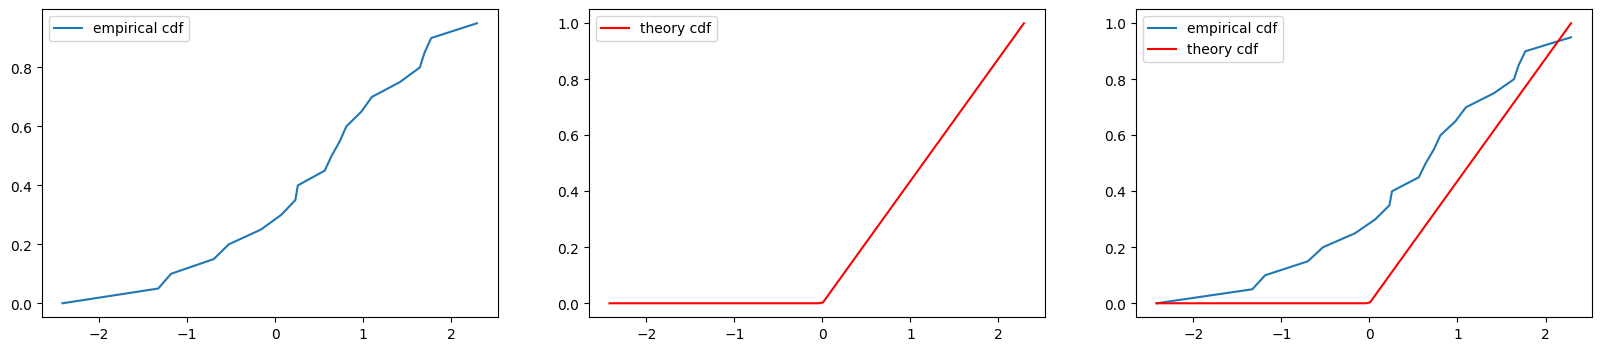

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

X_origin = np.sort(X_origin)

axes[0].plot(X_origin, [ecdf(X_origin, t) for t in X_origin], label='empirical cdf')
axes[2].plot(X_origin, [ecdf(X_origin, t) for t in X_origin], label='empirical cdf')

theta_hat = X_origin.max()
x_for_theory = np.linspace(X_origin.min(), X_origin.max(), 100)
axes[1].plot(x_for_theory, [cdf(t, 0 , theta_hat) for t in x_for_theory],label='theory cdf', color='red')
axes[2].plot(x_for_theory, [cdf(t, 0 , theta_hat) for t in x_for_theory],label='theory cdf', color='red')
# from scipy.stats import uniform
# Y = uniform.cdf(X, 0, theta_hat)
# axes[1].plot(X, Y, label='theory cdf from scipy', color='yellow')
# axes[2].plot(X, Y, label='theory cdf from scipy', color='yellow')

axes[0].legend()
axes[1].legend()
_ = axes[2].legend()

Conclusion: The estimated distribution does NOT correspond to the sample distribution.